### Search and Destroy:

This notebook defines the problem environment and analyses the agent's search of the target using the approaches of Rule 1 and Rule 2.

## Environment

In [0]:
# Import libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import pprint as pp
import pandas as pd
from operator import itemgetter
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
import pdb

In [0]:
def place_target(env_terrains):
  a = env_terrains.shape[0] - 1

  i = random.randint(0,a)
  j = random.randint(0,a)

  return((i, j))

In [0]:
def generate_environment(a):

  # Generates an environment of dimension a*a

  env_terrains = np.zeros((a,a))

  for i in range(a):
    for j in range(a):
      terrain = random.random()
      
      if terrain < 0.2:
        env_terrains[i, j] = 5 # Flat terrain with p = 0.2
      elif terrain < 0.5:
        env_terrains[i, j] = 10 # Hilly terrain with p = 0.3
      elif terrain < 0.8:
        env_terrains[i, j] = 15 # Forested terrain with p = 0.3
      else:
        env_terrains[i, j] = 20 # Maze of caves with p = 0.2
  
  target_location = place_target(env_terrains)
  environment = (env_terrains, target_location)
  return environment

In [0]:
def display_grid(environment):
  env_grid = environment[0]
  target_location = environment[1]

  plt.figure(figsize = (8, 8))
  color_list = ['white', 'brown', 'green', 'gray']
  palette = sns.color_palette(color_list)
  ax = sns.heatmap(env_grid, annot = True,  linewidths = 0.01, linecolor = 'darkgray', cbar = False, xticklabels = True, yticklabels = True)
  ax.add_patch(Rectangle((target_location[1], target_location[0]), 1, 1, fill= False, capstyle = 'projecting', edgecolor='gold', linewidth = 4))
  plt.text(target_location[1] + 0.5, target_location[0] + 0.5, 'x', horizontalalignment = 'center', verticalalignment = 'center', fontsize = 30, color = 'gold')
  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.show()

In [0]:
def search_cell(environment, cell):

  env_grid = environment[0]
  target_location = environment[1]

  if cell != target_location:
    return False

  else:
    if env_grid[cell] == 5:
      if random.random() < 0.9:
        return True
    elif env_grid[cell] == 10:
      if random.random() < 0.7:
        return True
    elif env_grid[cell] == 15:
      if random.random() < 0.3:
        return True
    elif env_grid[cell] == 20:
      if random.random() < 0.1:
        return True
    return False

## Agent:

Decision rules - based on belief map and false negative rate of terrain of the cell:

In [0]:
def rule_1(belief_map):
  cell_index = np.unravel_index(np.argmax(belief_map, axis=None), belief_map.shape)
  return cell_index

In [0]:
def rule_2(environment, belief_map, false_negative_rate):
  
  false_negative_matrix = environment[0]/5
  for x in range(1,5):
   false_negative_matrix[false_negative_matrix == x] = (1 - false_negative_rate[x-1])

  new_probability = np.multiply(false_negative_matrix, belief_map)
  cell_index = np.unravel_index(np.random.choice(np.flatnonzero(belief_map == belief_map.max())), belief_map.shape)
  return cell_index

Function which updates the agent's belief of all the cells (belief of finding the target in the cell) whenever a cell is explored and the target is not found in the cell.

In [0]:
def update_belief(environment, prior_belief_map, cell_opened, false_negative_rate):
    
    dim = environment[0].shape[0]
    terrain = np.int(environment[0][cell_opened]/5)-1
    false_negative_cell_opened = false_negative_rate[terrain]
    denominator = 0
    
    for i in range(dim):
      for j in range(dim):
        cell = (i,j)
        if(cell_opened == cell):
          p = false_negative_cell_opened
        else:
          p = 1
        denominator = denominator + (prior_belief_map[cell] * p)
 
    #print(denominator)
    update_belief_map = prior_belief_map/denominator
    update_belief_map[cell_opened] = update_belief_map[cell_opened] * false_negative_cell_opened

    return update_belief_map

In [0]:
def agent(environment,rule_number):

  env_grid = environment[0]
  a = env_grid.shape[0]

  initial_belief = 1/(a*a)
  belief_map = np.full((a,a), initial_belief)

  false_negative_rate = [0.1, 0.3, 0.7, 0.9]
  num_of_searches = 0

  while(True):

    num_of_searches = num_of_searches + 1
    if rule_number == 0:
      # Rule 1 approach to select the cell
      cell = rule_1(belief_map)
    else:
      # Rule 2 approach to select the cell
      cell = rule_2(environment, belief_map, false_negative_rate)

    print("----UPDATED BELIEF MAP ----")
    sns.heatmap(belief_map, linewidths=0.2, cmap="Blues", )
    plt.text(cell[1] + 0.5, cell[0] + 0.5, 'x', horizontalalignment = 'center', verticalalignment = 'center', fontsize = 30, color = 'red')
    plt.title("Belief map update - Moving Target")
    fig = plt.gcf()
    plt.show()
    #fig.savefig('bonus_belief_'+str(num_of_searches))
    
    # Explore the selected cell
    is_target = search_cell(environment, cell)

    if(is_target):
      print("Success!")
      print("num_searches = ", num_of_searches)
      return num_of_searches
    else:
      belief_map = update_belief(environment, belief_map, cell, false_negative_rate) 

Testing the agent:

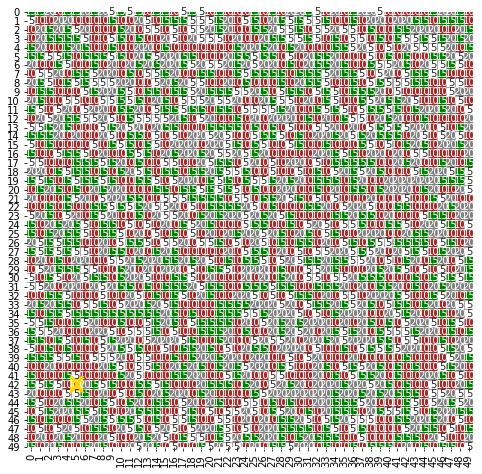

Terrain of Target: 1
Success!
num_searches =  1160
Time: 2.3542914390563965


In [0]:
a = 50
environment = generate_environment(a)
display_grid(environment)
start_time = time.time()
agent(environment,1)
print("Time:", time.time()- start_time)

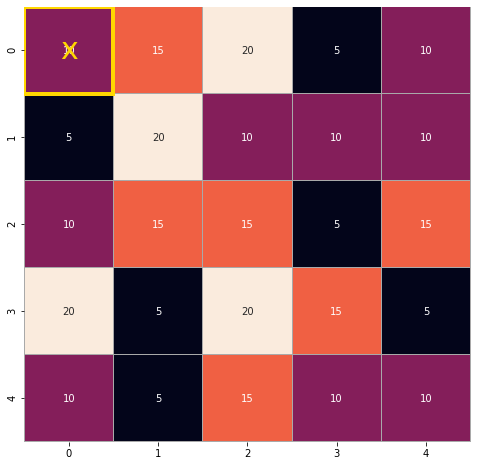

----UPDATED BELIEF MAP ----


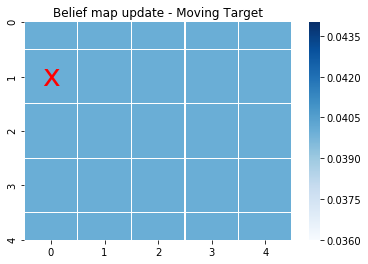

----UPDATED BELIEF MAP ----


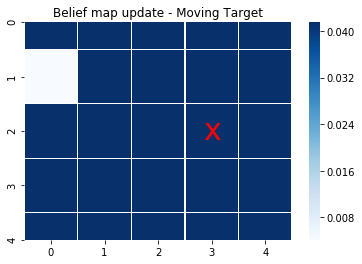

----UPDATED BELIEF MAP ----


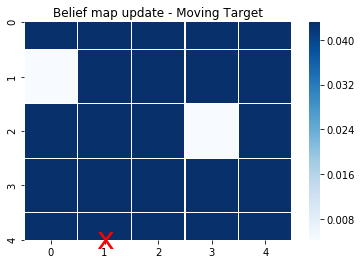

----UPDATED BELIEF MAP ----


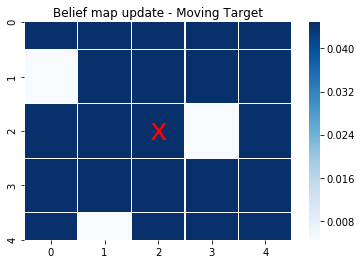

----UPDATED BELIEF MAP ----


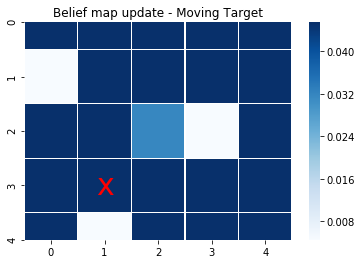

----UPDATED BELIEF MAP ----


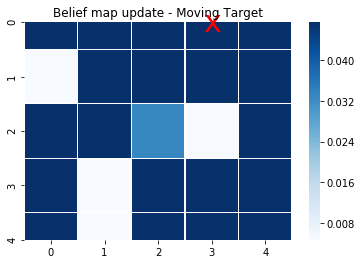

----UPDATED BELIEF MAP ----


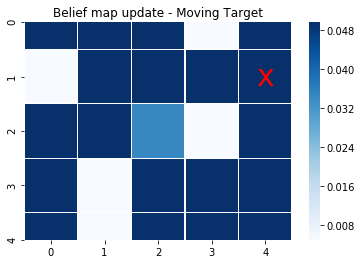

----UPDATED BELIEF MAP ----


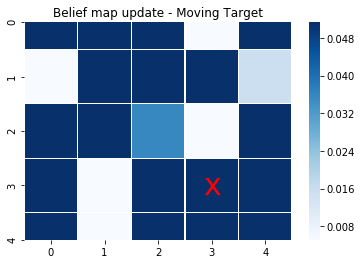

----UPDATED BELIEF MAP ----


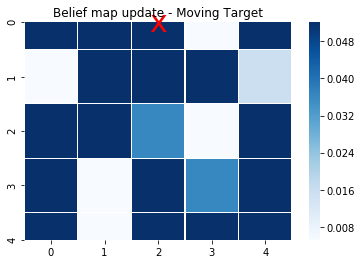

----UPDATED BELIEF MAP ----


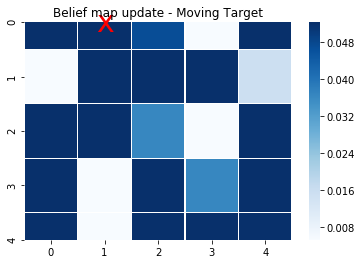

----UPDATED BELIEF MAP ----


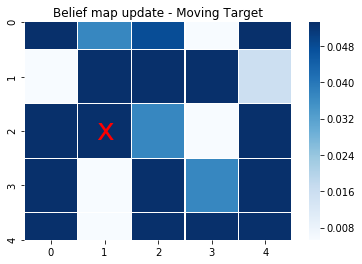

----UPDATED BELIEF MAP ----


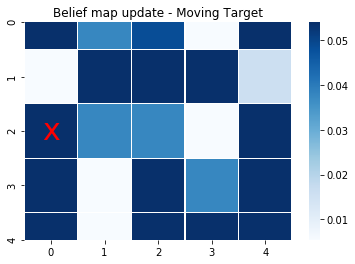

----UPDATED BELIEF MAP ----


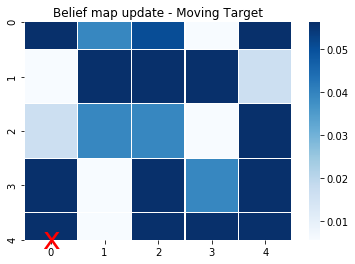

----UPDATED BELIEF MAP ----


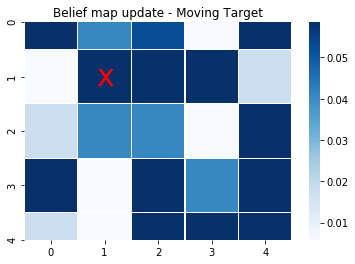

----UPDATED BELIEF MAP ----


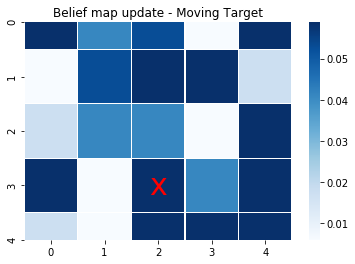

----UPDATED BELIEF MAP ----


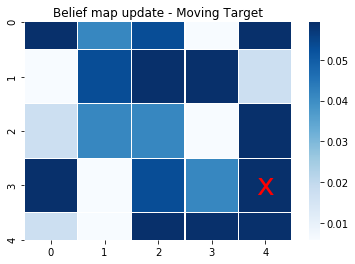

----UPDATED BELIEF MAP ----


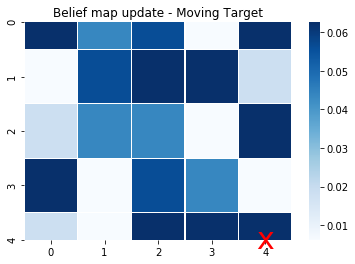

----UPDATED BELIEF MAP ----


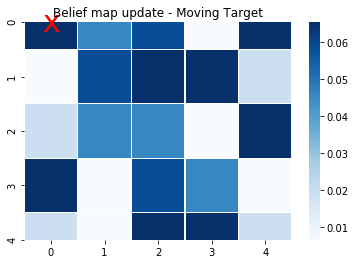

Success!
num_searches =  18
Time: 3.9892776012420654


In [10]:
a = 5
environment = generate_environment(a)
display_grid(environment)
start_time = time.time()
agent(environment,1)
print("Time:", time.time()- start_time)

### Analysis: 

Analysing performance of Rule 1 and Rule 2 on the same map (with target location changing each time) and on multiple maps (different environments each time).

In [0]:
def performance_analysis(num_trials, dim):

  total_searches_1 = 0
  total_searches_2 = 0

  environment = generate_environment(dim)
  env_grid = environment[0]

  false_negative_rate = [0.1, 0.3, 0.7, 0.9]

  for i in range(num_trials):

    target_location = place_target(env_grid)
    environment = (env_grid, target_location)

    num_of_searches_1 = agent(environment,0)  # Rule 1
    num_of_searches_2 = agent(environment,1)  # Rule 2
    
    total_searches_1 = total_searches_1 + num_of_searches_1
    total_searches_2 = total_searches_2 + num_of_searches_2

  avg_searches_1 = total_searches_1/num_trials
  avg_searches_2 = total_searches_2/num_trials

  print("Average number of searches if Rule 1 is used: " + str(avg_searches_1))
  print("Average number of searches if Rule 2 is used: " + str(avg_searches_2))

In [0]:
performance_analysis(50,50)

Average number of searches if Rule 1 is used: 4836.66
Average number of searches if Rule 2 is used: 3974.22


In [0]:
def multiple_maps(num_trials,a):

  total_searches_1 = 0
  total_searches_2 = 0

  false_negative_rate = [0.1, 0.3, 0.7, 0.9]

  for i in range(num_trials):
      environment = generate_environment(a)
      env_grid = environment[0]
      target_location = place_target(env_grid)

      initial_belief = 1/(a * a)
      belief_map = np.full((a, a), initial_belief)

      num_of_searches_1 = rule_1_approach(environment,belief_map,false_negative_rate)
      num_of_searches_2 = rule_2_approach(environment,belief_map,false_negative_rate)
      
      total_searches_1 = total_searches_1 + num_of_searches_1
      total_searches_2 = total_searches_2 + num_of_searches_2

  avg_searches_1 = total_searches_1/num_trials
  avg_searches_2 = total_searches_2/num_trials

  print("Average number of searches if Rule 1 is used: " + str(avg_searches_1))
  print("Average number of searches if Rule 2 is used: " + str(avg_searches_2))

In [0]:
multiple_maps(50,50)

Average number of searches if Rule 1 is used: 5033.96
Average number of searches if Rule 2 is used: 4147.1


#### Terrain wise analysis of Rule 1 and Rule 2:

In [0]:
## Function to generate environment with target in a particular terrain

def assign_terrain(a,terrain_type):

  # Terrain Type: 0 - Flat, 1 - Hilly, 2 - Forested, 3 - Caves
  env_terrains = np.zeros((a,a))

  flat_list = []
  hilly_list = []
  forest_list = []
  cave_list = []

  for i in range(a):
    for j in range(a):
      terrain = random.random()
      if terrain < 0.2:
        env_terrains[i, j] = 5 # Flat terrain with p = 0.2
        flat_list.append((i,j))
      elif terrain < 0.5:
        env_terrains[i, j] = 10 # Hilly terrain with p = 0.3
        hilly_list.append((i,j))
      elif terrain < 0.8:
        env_terrains[i, j] = 15 # Forested terrain with p = 0.3
        forest_list.append((i,j))
      else:
        env_terrains[i, j] = 20 # Maze of caves with p = 0.2
        cave_list.append((i,j))
  
  if terrain_type == 0:
    n = len(flat_list)
    index = random.randint(0,n-1)
    target_location = flat_list[index]
  elif terrain_type == 1:
    n = len(hilly_list)
    index = random.randint(0,n-1)
    target_location = hilly_list[index]
  elif terrain_type == 2:
    n = len(forest_list)
    index = random.randint(0,n-1)
    target_location = forest_list[index]
  elif terrain_type == 3:
    n = len(cave_list)
    index = random.randint(0,n-1)
    target_location = cave_list[index]

  environment = (env_terrains, target_location)
  num_terrains = [len(flat_list), len(hilly_list), len(forest_list), len(cave_list)]
  return environment, num_terrains

Functions to validate the performance of rule 1 and rule 2:

In [0]:
def check_rule_1(num_trials, dim):

  false_negative_rate = [0.1, 0.3, 0.7, 0.9]

  average_list = np.full((4), 0)
  average_matrix = np.full((4, 4), 0)
  rule_performance = np.full((4), 0)

  for ter in range(4):
    print("----------------------------")
    print("Terrain " + str(ter))
    for i in range(num_trials):
      print("----------------------------")
      print("Iteration " + str(i) + ":")
      
      environment, num_terrains = assign_terrain(dim, ter)
      env_grid = environment[0]
      visits = np.full((4), 0)

      is_target_2 = False
      num_of_searches_2 = 0
      initial_belief = 1/(dim * dim)
      belief_map = np.full((dim, dim), initial_belief)

      # Rule 1
      while(True):
        num_of_searches_2 = num_of_searches_2 + 1
        cell = rule_1(belief_map)
        terrain = int((env_grid[cell]/5) - 1)
        visits[terrain] += 1
        is_target_2 = search_cell(environment, cell)
        if(is_target_2):
          break
        else:
          belief_map = update_belief(environment, belief_map, cell , false_negative_rate)
      
      print("Cells per terrain: " + str(num_terrains))
      print("Visits per terrain: " + str(visits))
      print("Number of searches: " + str(num_of_searches_2))
      average_list += visits
      rule_performance[ter] += num_of_searches_2
    
    average_list = average_list/num_trials
    print("Average visits per terrain: " + str(average_list))
    for j in range(4):
      average_matrix[ter][j] += average_list[j]

  print("Average Matrix: ")
  pp.pprint(average_matrix)
  return rule_performance

In [0]:
 def check_rule_2(num_trials, dim):

  false_negative_rate = [0.1, 0.3, 0.7, 0.9]

  average_list = np.full((4), 0)
  average_matrix = np.full((4, 4), 0)
  rule_performance = np.full((4), 0)
  
  for ter in range(4):
    print("----------------------------")
    print("Terrain " + str(ter))
    for i in range(num_trials):
      print("----------------------------")
      print("Iteration " + str(i) + ":")
      
      environment, num_terrains = assign_terrain(dim, ter)
      env_grid = environment[0]
      visits = np.full((4), 0)

      is_target_2 = False
      num_of_searches_2 = 0
      initial_belief = 1/(dim * dim)
      belief_map = np.full((dim, dim), initial_belief)

      # Rule 1
      while(True):
        num_of_searches_2 = num_of_searches_2 + 1
        cell = rule_2(environment, belief_map, false_negative_rate)
        terrain = int((env_grid[cell]/5) - 1)
        visits[terrain] += 1
        is_target_2 = search_cell(environment, cell)
        if(is_target_2):
          break
        else:
          belief_map = update_belief(environment, belief_map, cell , false_negative_rate)
      
      print("Cells per terrain: " + str(num_terrains))
      print("Visits per terrain: " + str(visits))
      print("Number of searches: " + str(num_of_searches_2))
      average_list += visits
      rule_performance[ter] += num_of_searches_2
    
    average_list = average_list/num_trials
    print("Average visits per terrain: " + str(average_list))
    for j in range(4):
      average_matrix[ter][j] += average_list[j]

  print("Average Matrix: ")
  pp.pprint(average_matrix)
  return rule_performance

In [0]:
average_perf_1 = np.full(4,0)
average_perf_2 = np. full(4,0)
x_text_dict = [ "Flat", "Hilly", "Forested", "Caves"]
  
for i in range(10):  
  performance_rule1 = check_rule_1(20, 50)
  print("Rule 1 performance: " + str(performance_rule1))
  average_perf_1 += performance_rule1
  plt.figure()
  sns.barplot(x_text_dict, list(performance_rule1))
  
  performance_rule2 = check_rule_2(50, 50)
  print("Rule 2 performance: " + str(performance_rule2))
  average_perf_2 += performance_rule2
  plt.figure()
  sns.barplot(x_text_dict, list(performance_rule2))

print("Average Rule 1 performance: " + str(average_perf_1/10))
print("Average Rule 2 performance: " + str(average_perf_2/10))
plt.figure()
sns.barplot(x_text_dict, list(average_perf_1))
plt.figure()
sns.barplot(x_text_dict, list(average_perf_2))

----------------------------
Terrain 0
----------------------------
Iteration 0:
Cells per terrain: [512, 746, 723, 519]
Visits per terrain: [302 461 458 341]
Number of searches: 1562
----------------------------
Iteration 1:
Cells per terrain: [515, 749, 754, 482]
Visits per terrain: [386 582 592 366]
Number of searches: 1926
----------------------------
Iteration 2:
Cells per terrain: [497, 726, 781, 496]
Visits per terrain: [485 699 756 478]
Number of searches: 2418
----------------------------
Iteration 3:
Cells per terrain: [507, 729, 774, 490]
Visits per terrain: [  624  1458  5418 10780]
Number of searches: 18280
----------------------------
Iteration 4:
Cells per terrain: [472, 774, 748, 506]
Visits per terrain: [ 85 164 146 109]
Number of searches: 504
----------------------------
Iteration 5:
Cells per terrain: [500, 751, 769, 480]
Visits per terrain: [129 192 196 115]
Number of searches: 632
----------------------------
Iteration 6:
Cells per terrain: [519, 758, 739, 484]
Vi

In [0]:
def terrain_analysis(num_trials, a):

  terrain_list = ["Flat", "Hilly", "Forested", "Caves"]
  factor_list = ["Rule_1", "Rule_2"]
  comparision_table = pd.DataFrame(index = terrain_list, columns = factor_list)

  false_negative_rate = [0.1, 0.3, 0.7, 0.9]

  ## Flat terrain
  total_flat_1 = 0
  total_flat_2 = 0

  for i in range(num_trials):
    environment = assign_terrain(a, 0)
    terrain_location = environment[1]
    initial_belief = 1/(a * a)
    
    belief_map = np.full((a, a), initial_belief)
    total_flat_1 += rule_1_approach(environment, belief_map, false_negative_rate)
    belief_map = np.full((a, a), initial_belief)
    total_flat_2 += rule_2_approach(environment, belief_map, false_negative_rate)

  comparision_table.loc['Flat']['Rule_1'] = total_flat_1/num_trials
  comparision_table.loc['Flat']['Rule_2'] = total_flat_2/num_trials

  ## Hilly terrain
  total_hilly_1 = 0
  total_hilly_2 = 0

  for i in range(num_trials):
    environment = assign_terrain(a, 1)
    terrain_location = environment[1]
    initial_belief = 1/(a * a)
    
    belief_map = np.full((a, a), initial_belief)
    total_hilly_1 += rule_1_approach(environment, belief_map, false_negative_rate)
    belief_map = np.full((a, a), initial_belief)
    total_hilly_2 += rule_2_approach(environment, belief_map, false_negative_rate)

  comparision_table.loc['Hilly']['Rule_1'] = total_hilly_1/num_trials
  comparision_table.loc['Hilly']['Rule_2'] = total_hilly_2/num_trials

  ## Forested terrain
  total_forested_1 = 0
  total_forested_2 = 0

  for i in range(num_trials):
    environment = assign_terrain(a, 1)
    terrain_location = environment[1]
    initial_belief = 1/(a * a)
    
    belief_map = np.full((a, a), initial_belief)
    total_forested_1 += rule_1_approach(environment, belief_map, false_negative_rate)
    belief_map = np.full((a, a), initial_belief)
    total_forested_2 += rule_2_approach(environment, belief_map, false_negative_rate)

  comparision_table.loc['Forested']['Rule_1'] = total_forested_1/num_trials
  comparision_table.loc['Forested']['Rule_2'] = total_forested_2/num_trials

  ## Caves terrain
  total_caves_1 = 0
  total_caves_2 = 0

  for i in range(num_trials):
    environment = assign_terrain(a, 1)
    terrain_location = environment[1]
    initial_belief = 1/(a * a)
    
    belief_map = np.full((a, a), initial_belief)
    total_caves_1 += rule_1_approach(environment, belief_map, false_negative_rate)
    belief_map = np.full((a, a), initial_belief)
    total_caves_2 += rule_2_approach(environment, belief_map, false_negative_rate)

  comparision_table.loc['Caves']['Rule_1'] = total_caves_1/num_trials
  comparision_table.loc['Caves']['Rule_2'] = total_caves_2/num_trials
  
  print(comparision_table)
  # ax = comparision_table.plot.bar(rot=0)

In [0]:
terrain_analysis(50, 50)

           Rule_1   Rule_2
Flat       3007.7   919.56
Hilly     6213.18  1783.44
Forested  4255.46  1918.96
Caves      4487.9   2252.5
